In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils

In [4]:
#Load the training data
nb_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


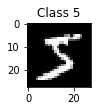

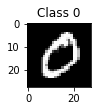

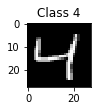

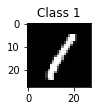

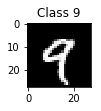

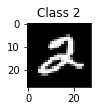

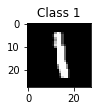

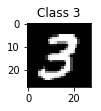

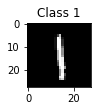

In [5]:
#display training data
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Class {}".format(y_train[i]))
    plt.show()

In [6]:
#format the data for training
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [7]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("y train= ",Y_train)
print("y test= ",Y_test)

y train=  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
y test=  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

In [9]:
#Build the neural network
model = Sequential() #creating object
print(model)

In [10]:
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [12]:
#Train the model
model.fit(X_train, Y_train,batch_size=128, verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 193us/step - loss: 13.3243 - val_loss: 14.3120
Epoch 2/10
60000/60000 [==============================] - 20s 339us/step - loss: 13.2708 - val_loss: 13.1217
Epoch 3/10
60000/60000 [==============================] - 29s 476us/step - loss: 12.9951 - val_loss: 13.0347
Epoch 4/10
60000/60000 [==============================] - 30s 494us/step - loss: 13.3751 - val_loss: 14.4321
Epoch 5/10
60000/60000 [==============================] - 29s 488us/step - loss: 13.5869 - val_loss: 13.0976
Epoch 6/10
60000/60000 [==============================] - 29s 485us/step - loss: 13.0465 - val_loss: 13.0976
Epoch 7/10
60000/60000 [==============================] - 37s 616us/step - loss: 13.0465 - val_loss: 13.0976
Epoch 8/10
60000/60000 [==============================] - 38s 631us/step - loss: 13.0465 - val_loss: 13.0976
Epoch 9/10
60000/60000 [==============================] - 38s 636us/step - los

In [13]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

10000/10000 [==============================] - 0s 46us/step


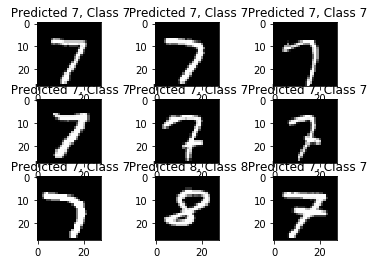

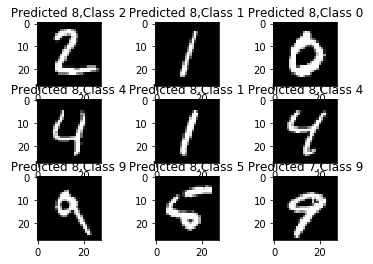

In [24]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title(" Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.title(" Predicted {},Class {} ".format(predicted_classes[incorrect], y_test[incorrect]))
plt.show()